## Illustrative example of a Gaussian Process

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
# Notebook magic
%matplotlib inline
%load_ext autoreload
%autoreload 2

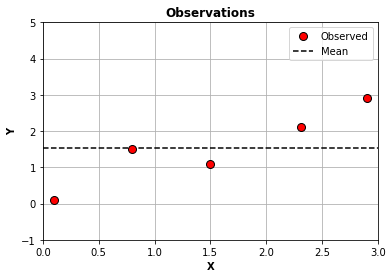

In [18]:
# Define some hypothetical data
X = np.array([0.1, 0.8, 1.5, 2.31, 2.9])
Y = np.array([0.1, 1.5, 1.1, 2.1, 2.9])
# Plot it
fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.plot(X,Y,'r.',mec='k',markersize=16,label='Observed',zorder=10)
axes.plot([0,3],[np.mean(Y),np.mean(Y)],'k--',label='Mean')
axes.set_title('Observations',fontweight='bold')
axes.set_xlabel('X',fontweight='bold')
axes.set_ylabel('Y',fontweight='bold')
axes.set_xlim((0,3))
axes.set_ylim((-1,5))
axes.grid()
axes.legend();

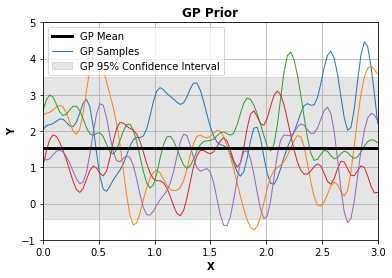

In [20]:
# Now we will define the GP model and visualise the prior
x = np.linspace(0, 3, 101) # x domain of GP
n_draws = 5; # number of draws to take from GP
kernel = RBF(0.1, (1e-2, 0.4)) # GP kernel
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=False, random_state=123)
# Draw from the prior
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
y_mean = y_mean + np.mean(Y)
y_samples = gp.sample_y(x[:, np.newaxis], n_draws)
y_samples = y_samples + np.mean(Y)
# Plot the result
fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.plot(x, y_mean, 'k', lw=3, zorder=10, label = 'GP Mean')
axes.plot(x, y_samples[:,0], lw=1, label = 'GP Samples') # Plot 1 for legend
axes.plot(x, y_samples[:,1:], lw=1) # Plot rest
axes.fill_between(x,
                  (y_mean-1.96*y_std),
                  y_mean+1.95*y_std,
                  alpha=0.1,
                  color='k',
                  label='GP 95% Confidence Interval')
axes.set_title('GP Prior',fontweight='bold')
axes.set_xlabel('X',fontweight='bold')
axes.set_ylabel('Y',fontweight='bold')
axes.set_xlim((0,3))
axes.set_ylim((-1,5))
axes.grid()
axes.legend();

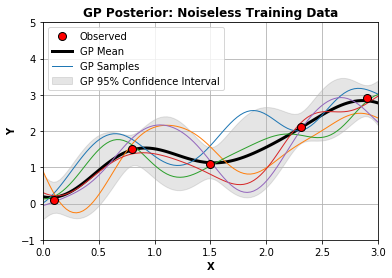

In [24]:
# Now let's constrain the GP prior with our observations
gp.fit(X[:, np.newaxis], Y)
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
y_samples = gp.sample_y(x[:, np.newaxis], n_draws)
# Plot the result
fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.plot(X,Y,'r.',mec='k',markersize=16,label='Observed',zorder=10)
axes.plot(x, y_mean, 'k', lw=3, label='GP Mean')
axes.plot(x, y_samples[:,0], lw=1, label = 'GP Samples') # Plot 1 for legend
axes.plot(x, y_samples[:,1:], lw=1) # Plot rest
axes.fill_between(x,
                  (y_mean-1.96*y_std),
                  y_mean+1.96*y_std,
                  alpha=0.1,
                  color='k',
                  label='GP 95% Confidence Interval')
axes.set_title('GP Posterior: Noiseless Training Data',fontweight='bold')
axes.set_xlabel('X',fontweight='bold')
axes.set_ylabel('Y',fontweight='bold')
axes.set_xlim((0,3))
axes.set_ylim((-1,5))
axes.grid()
axes.legend()

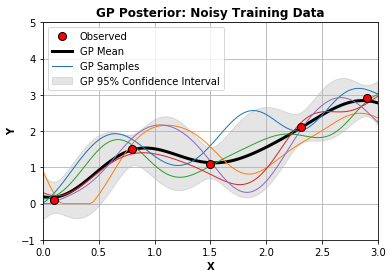

In [23]:
# What about of our observations are noisy? Let's create a new model that 
# acknowledges noise (alpha) in the observations
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=True, random_state=123,alpha=0.05)
gp.fit(X[:, np.newaxis], Y)
y_mean, y_std = gp.predict(x[:, np.newaxis], return_std=True)
y_samples = gp.sample_y(x[:, np.newaxis], n_draws)
# Plot the result
fig, axes = plt.subplots(1,1,figsize=(6,4))
axes.plot(X,Y,'r.',mec='k',markersize=16,label='Observed',zorder=10)
axes.plot(x, y_mean, 'k', lw=3, label = 'GP Mean')
axes.plot(x, y_samples[:,0].clip(0), lw=1, label = 'GP Samples') # Plot 1 for legend
axes.plot(x, y_samples[:,1:].clip(0), lw=1) # Plot rest
axes.fill_between(x,
                  (y_mean-1.96*y_std),
                  y_mean+1.96*y_std,
                  alpha=0.1,
                  color='k',
                  label='GP 95% Confidence Interval')
axes.set_title('GP Posterior: Noisy Training Data',fontweight='bold')
axes.set_xlabel('X',fontweight='bold')
axes.set_ylabel('Y',fontweight='bold')
axes.set_xlim((0,3))
axes.set_ylim((-1,5))
axes.grid()
axes.legend()